In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, select_scl5_regular_season
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

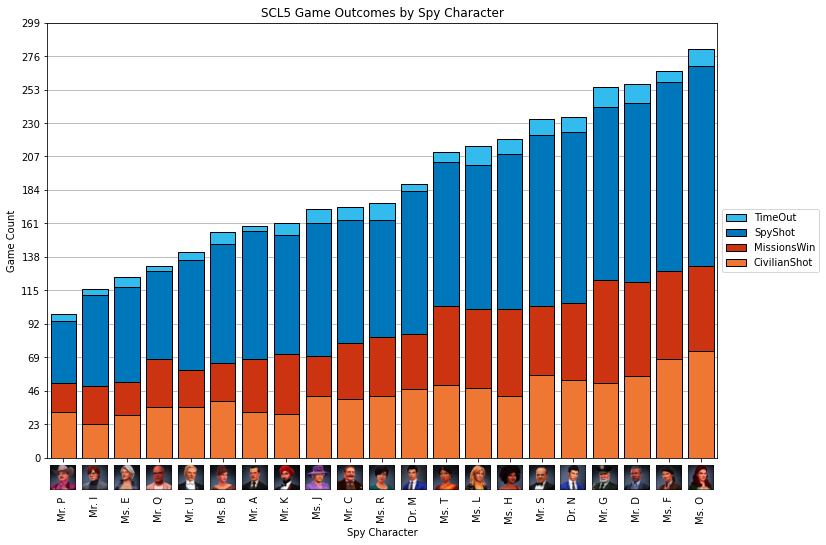

In [5]:
_=game_outcomes(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Spy Character",
        savefig='example_pictures/scl5_spy_selection.png'
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sum,
    )
)

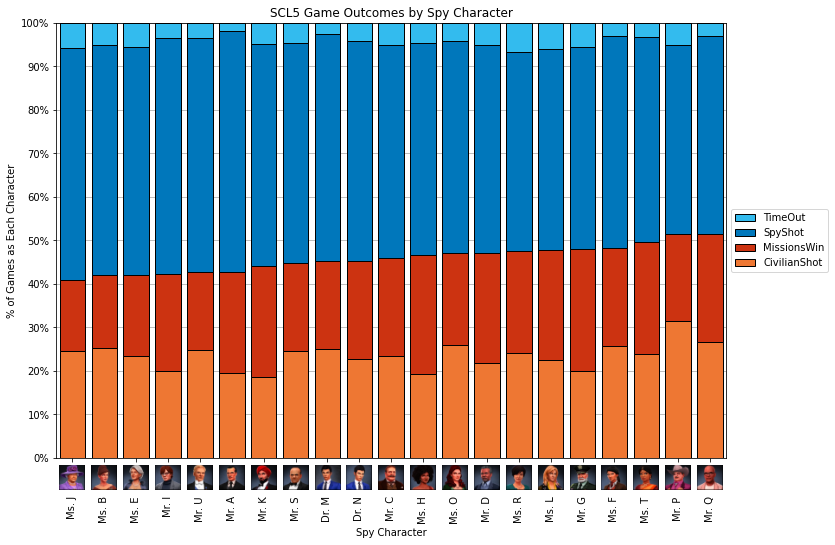

In [6]:
_=game_outcomes(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

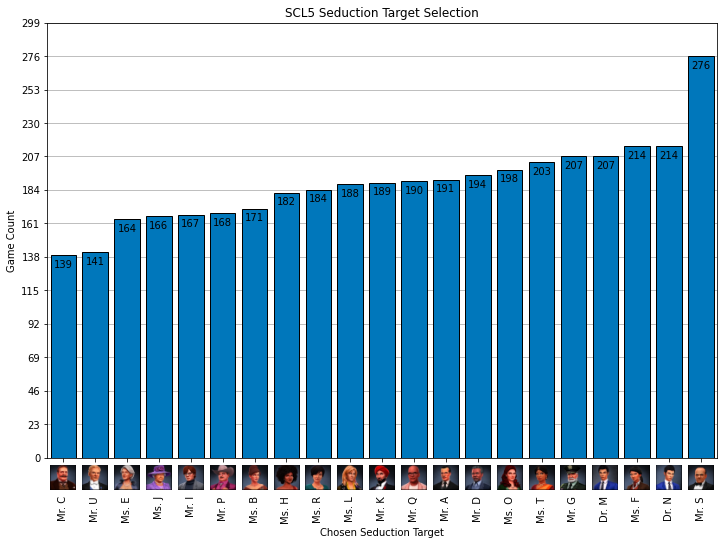

In [7]:
_=st_selection(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Seduction Target Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Seduction Target",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

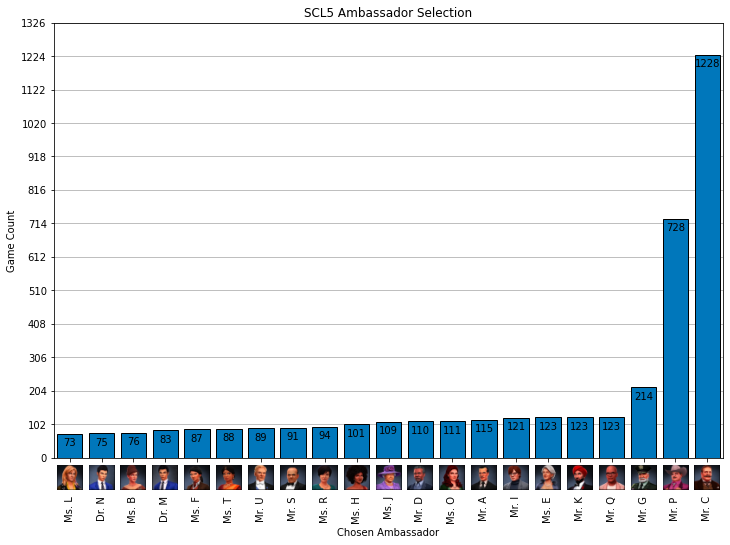

In [8]:
_=amba_selection(
    scl5_replays,
    axis_properties = AxisProperties(
        title="SCL5 Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)